# Phase Stabilistion

In [203]:
TT.freeTimeTagger(tagger)

True

In [ ]:
#run this cell if you want to be able to autoreload packages
#(meaning that you don't have to restart the kernal when you make changes to code)

%load_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
%run -i "prerequisites.py"

In [3]:
from scipy import optimize
from IPython.display import clear_output, display

In [110]:
# powermeter1 = Powermeter('PM100USB', serial='P2003916', unit='dBm', wavelength=1550) 
unit='mW'
wavelength=1550
#Charlie (tele) powermeters 10/03/20:
PM_C1 = PM('PM100USB', serial='P2007347',unit=unit, wavelength = wavelength)
PM_C2 = PM('PM100USB', serial='P2010371',unit=unit, wavelength = wavelength) 
PM_C3 = PM('PM100USB', serial='P2003683',unit=unit, wavelength = wavelength) 
PM_C4 = PM('PM100USB', serial='P2008115',unit=unit, wavelength = wavelength)
#Bob powermeters 10/03/20:
PM_B1 = PM('PM100USB', serial='P2005653',unit=unit, wavelength = wavelength)
PM_B2 = PM('PM100USB', serial='P2010372',unit=unit, wavelength = wavelength) 
PM_B3 = PM('PM100USB', serial='P2008116',unit=unit, wavelength = wavelength) 
PM_B4 = PM('PM100USB', serial='P2007346',unit=unit, wavelength = wavelength)

PM_signal = {"PM_C1":PM_C1,"PM_C2":PM_C2, "PM_C3":PM_C3,"PM_C4":PM_C4}
PM_idler = {"PM_B1":PM_B1,"PM_B2":PM_B2, "PM_B3":PM_B3,"PM_B4":PM_B4}
PM_all = {"PM_C1":PM_C1,"PM_C2":PM_C2, "PM_C3":PM_C3,"PM_C4":PM_C4, "PM_B1":PM_B1,"PM_B2":PM_B2, "PM_B3":PM_B3,"PM_B4":PM_B4}

### Laser

In [5]:
# Wavelengths
p_wavelength = 1549.3
i_wavelength = 1558.98
s_wavelength = 1539.77

unit='dBm'
serial_port_name = 'COM13'
mytunics = tunics(serial_port_name = serial_port_name, unit=unit)


Connected to Tunics laser on serial port COM13



In [6]:
# Laser Settings
mytunics.laser_wavelength(p_wavelength)
mytunics.laser_switch('on') 
mytunics.laser_power(14) 

In [ ]:
LP.live_opt_pow(heaters = PM_all)

# 4D Hadamard

In [16]:
def pow_measure_multiple(PM_dict, unit = "mW"):
    pow_measurements={}
    for keys, pow_meters in PM_dict.items():
        pow_meters.unit = unit
        pow_measurements[keys] = abs(pow_meters.measure())
    return pow_measurements

def pow_avg_on_first(PM_measured_dict, Normilised_pow, PM):
    phi_pows = {}
    A = PM_measured_dict[PM]/Normilised_pow[PM]
    for key, pow_measurement in PM_measured_dict.items():
        B = pow_measurement/Normilised_pow[key]
        phi_pows[PM + "+" + key] = ((A+B)/2)-1
    return phi_pows

In [ ]:
pow_sum_on_first(pow_measure_multiple(PM_signal), "PMa")

In [19]:
h.set_many_phases(Charlie_idenity)
time.sleep(0.2)
Normilised_pow = pow_measure_multiple(PM_idler, unit = "mW")
print("Normilised_pow:\n", Normilised_pow)
h.set_many_phases(Charlie_Hardamard)
time.sleep(0.2)
measured_pow = pow_measure_multiple(PM_idler, unit = "mW")
print("measured_pow:\n", measured_pow)
pow_avg_on_first(PM_measured_dict = measured_pow, Normilised_pow = Normilised_pow,  PM = "PMe")

Normilised_pow:
 {'PMe': 8.11741108e-13, 'PMf': 1.6760502700000002e-08, 'PMg': 1.8928889199999998e-11, 'PMh': 4.934664219999999e-09}
measured_pow:
 {'PMe': 2.28261615e-09, 'PMf': 3.86920834e-09, 'PMg': 1.7976136200000002e-08, 'PMh': 3.7012151199999995e-09}


{'PMe+PMe': 2811.000190090164,
 'PMe+PMf': 1405.115521426058,
 'PMe+PMg': 1879.8334571633409,
 'PMe+PMh': 1405.375117027834}

# Chip Configuration

# Chip Config

In [7]:
#Alice
h.set_many_phases(CF.Alice_FP_23)
h.set_many_phases(CF.Bob_23_Comp)
h.set_many_phases(CF.Charlie_23_Comp)

In [92]:
Bob_phase_max_pow = {
    #Bob
    "Atta1":0,
    "Atta2":pi,
    "Atta3":pi,
    "Atta4":pi,
    "MZIa1":0,
    "MZIa2":pi,
    "MZIa3":pi/2,
    "MZIa4":pi
    ,
    }

Charlie_phase_max_pow = {
    #Charlie
    "Attb1":0,
    "Attb2":pi,
    "Attb3":pi,
    "Attb4":0,
    "MZIb1":pi,
    "MZIb2":0,
    "MZIb3":pi,
    "MZIb4":pi/2
    }

h.set_many_phases(Bob_phase_max_pow)
h.set_many_phases(Charlie_phase_max_pow)

In [51]:
#Alice
h.set_many_phases({"BS1":pi/2,
    "BS2":pi,
    "BS3":pi,
    "WDM1":pi,
    "WDM2":pi,
    "WDM3":pi,
    "WDM4":pi,
    "Pre_RY1":pi,
    "Pre_RY2":pi,
    "Bell1":pi,
    "Bell2":pi,
    "Prj_RY1":pi,
    "Prj_RY2":pi,
    "Prj_RY3":pi,
    "Prj_RY4":pi,
    "Ctr_1":pi,
    "Ctr_2":pi,
    "Prj_RZ1":0,
    "Prj_RZ2":0,
    "Prj_RZ3":0,
    "Prj_RZ4":0,
    "Pre_RZ1":0,
    "Pre_RZ2":0,})

<Figure size 504x360 with 0 Axes>

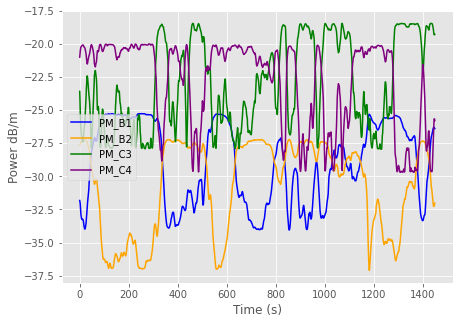

In [93]:
LP.live_opt_pow({"PM_B1":PM_B1,"PM_B2":PM_B2, "PM_C3":PM_C3,"PM_C4":PM_C4})

## Rings

In [9]:
# Read in Ring Volts
df = pd.read_csv("Ring_Coulping_Voltage.csv")
Ring_Volts = df.to_dict('r')[0]

In [10]:
# Setting the ring to have maximum number of entangled photons
for ring, volts in Ring_Volts.items():
    h.set_voltage(ring,volts)

In [43]:
ring = "MRR1"
h.set_voltage(ring,Ring_Volts[ring]-0.1)

In [32]:
ring = "MRR2"
h.set_voltage(ring,Ring_Volts[ring]-0.8)

In [23]:
ring = "MRR3"
h.set_voltage(ring,Ring_Volts[ring]-0.8)

In [42]:
ring = "MRR4"
h.set_voltage(ring,Ring_Volts[ring]-0.15)

# 2D Hadamard

In [132]:
class StabilisedMeasurements(MultiChipStabilisation):
    
    def measure(self, length, n_values, binwidth, *stab_channels):
        results = []
        Counter = TT.Counter(tagger, coinc_chans, binwidth = binwidth, n_values = n_values)
        Counter.clear()
        for i in range(0,length):
            self.stabilisation(self, *stab_channels)
            time.sleep(binwidth/(10**12)*n_values)
            results.append(Counter.getData())
            Counter.clear()
        
        return results
    

In [258]:
class MultiChipStabilisation():
    
    def __init__(self):
        pass
        
    def multi_stabilise(self, *stab_channels):
        self.multi_sweep(self, *stab_channels)
        while True:
            for index, channel in enumerate(stab_channels):
                fringe_dict = channel.stabilise_sweep()
                params = channel.fit(fringe_dict)
                channel.stabilise(params)
                time.sleep(1/len(stab_channels))
                clear_output(wait=True)
                print("Stabilising", index)
                
    def stabilisation(self, *stab_channels):
        for index, channel in enumerate(stab_channels):
            fringe_dict = channel.stabilise_sweep()
            params = channel.fit(fringe_dict)
            channel.stabilise(params)
        return True
                
    def multi_sweep(self, *stab_channels):
        for channel in stab_channels:
            channel.stabilise_sweep(True)
        return True
    
    def length(self, length):
        self.length = length
        return self.length
    
    def n_values(self, n_values):
        self.n_values = n_values
        return self.n_values
    
    def binwidth(self, binwidth):
        self.binwidth = binwidth
        return self.binwidth
    
    def measure(self, *stab_channels):
        results = []
        Counter = TT.Counter(tagger, coinc_chans, binwidth = self.binwidth, n_values = self.n_values)
        for i in range(0,self.length):
            self.stabilisation(*stab_channels)
            Counter.clear()
            time.sleep((self.binwidth/(10**12))*self.n_values)
            results.append(Counter.getData())
            clear_output(wait=True)
            print(i, "/", self.length)
        
        return results
    
    class PhaseStabilisation():

        def __init__(self, heater,
                    pow_met,
                    ):

            self.heater = heater
            self.pow_met = pow_met

        def stabilise_sweep(self, cal = False):
            self.fringe_dict = {}
            if cal:
                phase_range = self.phase_range(0, 2*pi, pi/10)
            else:
                phase_range = self.phase_range(0, 2*pi, pi/4)

            for phase in phase_range:
                h.set_phase(self.heater, phase)
                time.sleep(0.1)
                self.fringe_dict[phase] = self.pow_met.measure()

            return self.fringe_dict

        def fit(self, fringe_dict):
            phase_list = list(self.fringe_dict.keys())
            power_list = list(self.fringe_dict.values())
            initial_guess=[max(power_list), 0.5, 0, min(power_list)]
            param_bounds=([0, 0.3, -np.inf, 0], [2*max(power_list), 0.8, np.inf, max(power_list)]) # upper bound of amplitude could be given as related to the maximum power when not interfering?
            self.params, pcov = optimize.curve_fit(self.SineSq, phase_list, power_list, bounds = param_bounds, p0 = initial_guess)

    #         fit_phase_list = np.linespace(0, 2*pi, 30)
    #         sin_fit = SineSq(fit_phase_list, params[0], params[1], params[2], params[3])

            return self.params

        def stabilise(self, params):
            return h.set_phase(self.heater, -self.params[2]/self.params[1])

        def stabilisation(self):
            self.stabilise_sweep(True)
            while True:
                fringe_dict = self.stabilise_sweep()
                params = self.fit(fringe_dict)
                self.stabilise(params)
                time.sleep(1)
                print("Stabilised")


        def SineSq(self, x, amp, freq, phi_0, y_off):
            return amp*np.sin(freq*x+phi_0)**2+y_off

        def phase_range(self, start, stop, reso):
            return np.arange(start, stop, reso)

# Q. Measurements

In [204]:
%run -i "SC_Prerequisites.py"

In [296]:
## Configruation of the swabian setting the trigger levels for each channels and the input delays needed
channels = [1,2,7,8]
trigger_levels = {1:0.08, 2:0.08, 7:0.08, 8:0.08}
BC_input_delays = {1:0, 2:0, 7:15000, 8:15000}


SC.set_input_delays(BC_input_delays, tagger)
SC.set_trigger_levels(trigger_levels, tagger)

In [297]:
Coin_Combs = [[1,7], [1,8], [2,7], [2,8]] # Creates a list of list of the coindient channels, with the number enter being the number of channels used. 
coinc = TT.Coincidences(tagger, Coin_Combs, coincidenceWindow=10000) # Creates all of the coincdent channells of all the combinations from Coin_combs
coinc_chans = list(coinc.getChannels())  # Creates a list of the channel numbers


## Creates a Dict of the channels and the keys being the coincdent of the channels Example {"Ch[1,2]:19. Ch[1,3]:20...., Ch[7,8]:36"}
Coin_channel_dict = {}
i = 0
for channel in coinc_chans:
    Coin_channel_dict["Ch"+str(Coin_Combs[i])] = channel
    i += 1
    
## Creates a dictonry of the channels of the Coincdent channels are actually at, so each value is a class. 
Channels_Coinc = {}
for key, channel in Coin_channel_dict.items():
    Channels_Coinc[key] = TT.Countrate(tagger,[channel])

In [298]:
coinc_chans

[1004, 1005, 1006, 1007]

In [207]:
def Save_Results(results, path):
    df = pd.DataFrame(results)
    return df.to_csv(path+dt.now().strftime("%Y-%m-%d-%H-%M")+".csv")

def get_results(binwidth = 10**12, n_values = 300):
    Counter = TT.Counter(tagger, coinc_chans, binwidth = binwidth, n_values = n_values)
    time.sleep(binwidth/(10**12)*n_values)
    raw = Counter.getData()

    sum_channel_results = []
    for channel_result in Counter.getData():
        sum_channel_results.append(channel_result.sum())
    results = list(zip(Results_channels, sum_channel_results))
    return (results, sum_channel_results, raw)

In [248]:
Counter = TT.Counter(tagger, coinc_chans, binwidth = 10**11, n_values = 10)
Counter.clear()
time.sleep(1)
Counter.getData()

array([[0, 0, 2, 0, 1, 3, 1, 0, 2, 1],
       [0, 2, 0, 2, 0, 1, 0, 0, 0, 0],
       [0, 1, 0, 3, 0, 0, 0, 0, 1, 3],
       [0, 0, 0, 0, 0, 1, 0, 0, 1, 1]], dtype=int32)

In [299]:
MCS = MultiChipStabilisation()

In [300]:
Bob_stab = MCS.PhaseStabilisation("Pha2", PM_B1)
Charlie_stab = MCS.PhaseStabilisation("Phb2", PM_C3)

In [301]:
MCS.length = 300
MCS.binwidth = 10**10
MCS.n_values = 100

In [302]:
result = MCS.measure(Bob_stab, Charlie_stab)

299 / 300


In [303]:
summed_results = []
for sweep in result:
    buffer = []
    for channel in sweep:
        buffer.append(channel.sum())
    summed_results.append(buffer)

In [304]:
processed_results = []
np.array(summed_results)
for index in range(len(summed_results[0])):
    channel = []
    for row in summed_results:
        channel.append(row[index])
    processed_results.append(np.array(channel).sum())

In [305]:
processed_results

[32538, 20287, 10480, 6901]

In [306]:
save_path = "results/Counts_results_2D_3Chip_Had_background"
Save_Results(processed_results, save_path)

# Had(Charlie) and Comp(Bob) 

In [307]:
Bob_phase_max_pow = {
    #Bob
    "Atta1":0,
    "Atta2":pi,
    "Atta3":pi,
    "Atta4":pi,
    "MZIa1":0,
    "MZIa2":pi,
    "MZIa3":pi,
    "MZIa4":pi
    ,
    }

Charlie_phase_max_pow = {
    #Charlie
    "Attb1":0,
    "Attb2":pi,
    "Attb3":pi,
    "Attb4":0,
    "MZIb1":pi,
    "MZIb2":0,
    "MZIb3":pi,
    "MZIb4":pi/2
    }

h.set_many_phases(Bob_phase_max_pow)
h.set_many_phases(Charlie_phase_max_pow)

In [308]:
channels = [1,2,7,8]
trigger_levels = {1:0.08, 2:0.08, 7:0.08, 8:0.08}
BC_input_delays = {1:0, 2:0, 7:5000, 8:5000}


SC.set_input_delays(BC_input_delays, tagger)
SC.set_trigger_levels(trigger_levels, tagger)

In [309]:
Coin_Combs = [[1,7], [1,8], [2,7], [2,8]] # Creates a list of list of the coindient channels, with the number enter being the number of channels used. 
coinc = TT.Coincidences(tagger, Coin_Combs, coincidenceWindow=1000) # Creates all of the coincdent channells of all the combinations from Coin_combs
coinc_chans = list(coinc.getChannels())  # Creates a list of the channel numbers

In [310]:
result = MCS.measure(Charlie_stab)

299 / 300


In [311]:
summed_results = []
for sweep in result:
    buffer = []
    for channel in sweep:
        buffer.append(channel.sum())
    summed_results.append(buffer)

In [312]:
processed_results = []
np.array(summed_results)
for index in range(len(summed_results[0])):
    channel = []
    for row in summed_results:
        channel.append(row[index])
    processed_results.append(np.array(channel).sum())

In [313]:
processed_results

[8301, 2428, 1168, 387]

In [314]:
save_path = "results/Counts_results_2D_3Chip_Comp_Had_BC"
Save_Results(processed_results, save_path)

# Had(Bob) and Comp(Charlie) 

In [315]:
Bob_phase_max_pow = {
    #Bob
    "Atta1":0,
    "Atta2":pi,
    "Atta3":pi,
    "Atta4":pi,
    "MZIa1":0,
    "MZIa2":pi,
    "MZIa3":pi/2,
    "MZIa4":pi
    ,
    }

Charlie_phase_max_pow = {
    #Charlie
    "Attb1":0,
    "Attb2":pi,
    "Attb3":pi,
    "Attb4":0,
    "MZIb1":pi,
    "MZIb2":0,
    "MZIb3":pi,
    "MZIb4":pi
    }

h.set_many_phases(Bob_phase_max_pow)
h.set_many_phases(Charlie_phase_max_pow)

In [316]:
channels = [1,2,7,8]
trigger_levels = {1:0.08, 2:0.08, 7:0.08, 8:0.08}
BC_input_delays = {1:0, 2:0, 7:5000, 8:5000}


SC.set_input_delays(BC_input_delays, tagger)
SC.set_trigger_levels(trigger_levels, tagger)

In [317]:
Coin_Combs = [[1,7], [1,8], [2,7], [2,8]] # Creates a list of list of the coindient channels, with the number enter being the number of channels used. 
coinc = TT.Coincidences(tagger, Coin_Combs, coincidenceWindow=1000) # Creates all of the coincdent channells of all the combinations from Coin_combs
coinc_chans = list(coinc.getChannels())  # Creates a list of the channel numbers

In [318]:
result = MCS.measure(Bob_stab)

299 / 300


In [319]:
summed_results = []
for sweep in result:
    buffer = []
    for channel in sweep:
        buffer.append(channel.sum())
    summed_results.append(buffer)

In [320]:
processed_results = []
np.array(summed_results)
for index in range(len(summed_results[0])):
    channel = []
    for row in summed_results:
        channel.append(row[index])
    processed_results.append(np.array(channel).sum())

In [321]:
processed_results

[2266, 2680, 880, 995]

In [322]:
save_path = "results/Counts_results_2D_3Chip_Comp_Had_CB"
Save_Results(processed_results, save_path)

In [325]:
Bob_phase_max_pow = {
    #Bob
    "Atta1":0,
    "Atta2":pi,
    "Atta3":pi,
    "Atta4":pi,
    "MZIa1":0,
    "MZIa2":pi,
    "MZIa3":pi,
    "MZIa4":pi
    ,
    }

Charlie_phase_max_pow = {
    #Charlie
    "Attb1":0,
    "Attb2":pi,
    "Attb3":pi,
    "Attb4":0,
    "MZIb1":pi,
    "MZIb2":0,
    "MZIb3":pi,
    "MZIb4":pi
    }

h.set_many_phases(Bob_phase_max_pow)
h.set_many_phases(Charlie_phase_max_pow)

In [326]:
Counter = TT.Counter(tagger, channels, binwidth = 10**10, n_values = 1000)
Counter.clear()
time.sleep(10)
Counter.getData()

array([[  0,   0,   0, ..., 811, 852, 809],
       [  0,   0,   0, ..., 154, 125, 153],
       [  0,   0,   0, ..., 408, 452, 384],
       [  0,   0,   0, ..., 648, 600, 604]], dtype=int32)

In [327]:
save_path = "results/Counts_results_2D_3Chip_Singles"
Save_Results(processed_results, save_path)

In [ ]:
array([[  0,   0,   0, ..., 811, 852, 809],
       [  0,   0,   0, ..., 154, 125, 153],
       [  0,   0,   0, ..., 408, 452, 384],
       [  0,   0,   0, ..., 648, 600, 604]], dtype=int32)